***
# Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
data = load_boston()
boston = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston['MEDV'] = data['target']

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

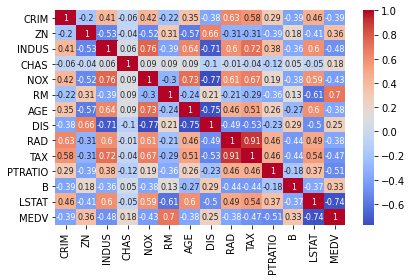

In [8]:
sns.heatmap(data=boston.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

In [9]:
# Removing columns

for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B', 'CRIM', 'CHAS', 'DIS', 'INDUS']:
    del boston[col]

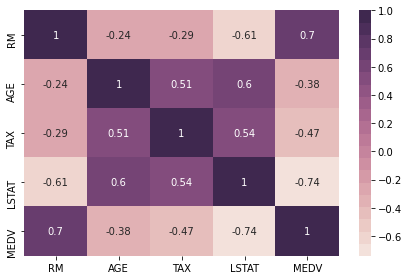

In [10]:
sns.heatmap(data=boston.corr().round(2), cmap=sns.cubehelix_palette(20, light=0.9, dark=0.2), annot=True)
plt.tight_layout()
plt.show()

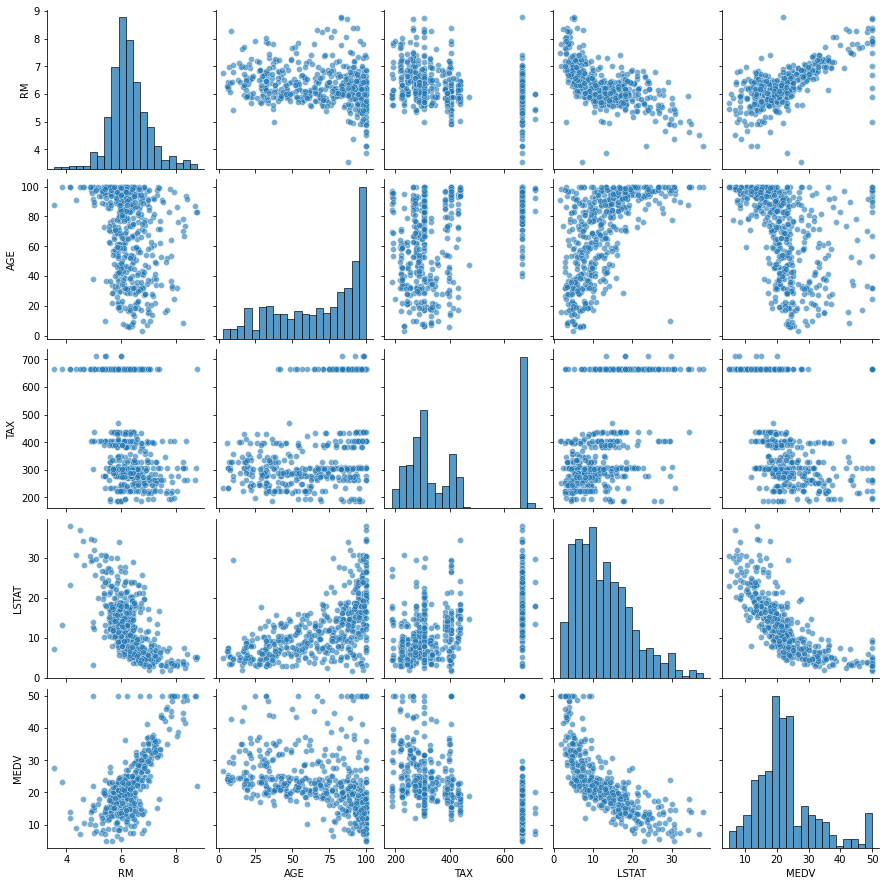

In [11]:
sns.pairplot(boston, plot_kws={'alpha': 0.6}, diag_kws={'bins': 20})

#### This shows:

- `RM` and `MEDV` are normally distributed.
- `AGE` is skewed to the left and `LSTAT` is skewed to the right.
- `TAX` has large ampunt of data around 700.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

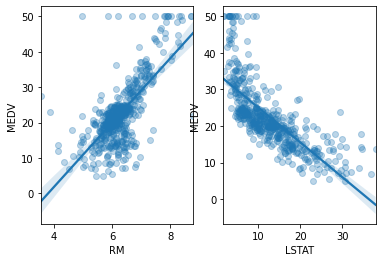

In [12]:
# Regplots: RM and LSTAT as these features are highly corelated

fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', boston, ax=ax[0], scatter_kws={'alpha':0.3})
sns.regplot('LSTAT', 'MEDV', boston, ax=ax[1], scatter_kws={'alpha':0.3})

#### Shaded area around the line represents 95% confidence intervals.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

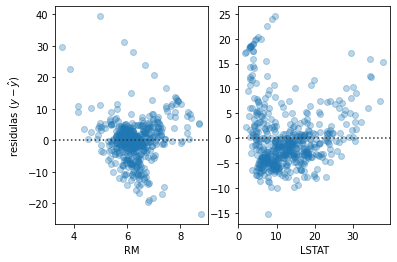

In [13]:
fig, ax = plt.subplots(1,2)
ax[0] = sns.residplot('RM', 'MEDV', boston, ax=ax[0], scatter_kws={'alpha':0.3})
ax[0].set_ylabel('residulas $(y-\hat{y})$')
ax[1] = sns.residplot('LSTAT', 'MEDV', boston, ax=ax[1], scatter_kws={'alpha':0.3})
ax[1].set_ylabel('')

#### Points in the residual plot represents the difference between actual and predcited value. 